# Model Performance and Evaluation Method : bankloan dataset

- Data
- Data Splitting
- Model Evaluation Benchmark
- Simple Hyperprameter Tuning
- Hyperparameter Tuning Grid Search

> ## Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
bankloan = pd.read_csv('bankloan.csv')

In [3]:
bankloan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


> ## Data Splitting

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

In [5]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [6]:
X = bankloan[fitur]
y = bankloan[target]

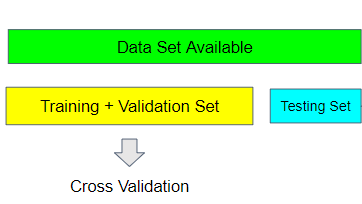

In [7]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 2020)

> ## Model Evaluation : Benchmark

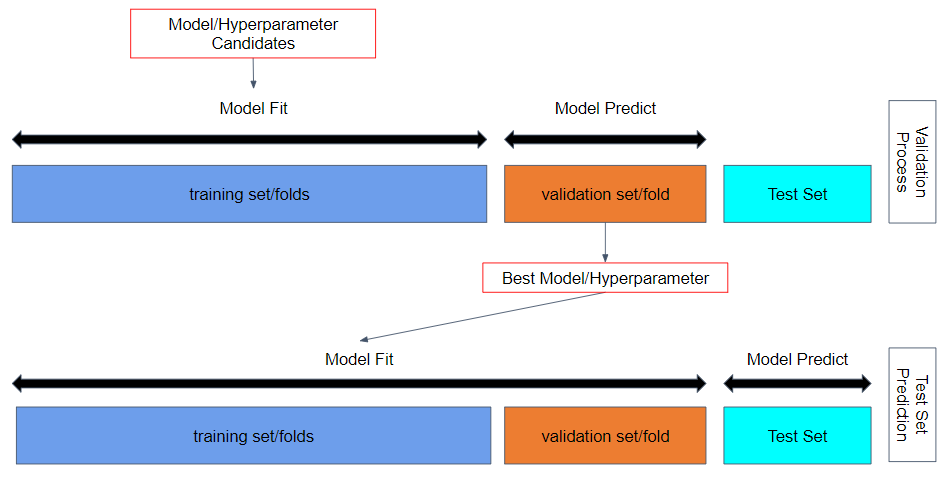

In [8]:
logreg = LogisticRegression(solver = 'liblinear', random_state = 2020)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [9]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings

In [10]:
warnings.filterwarnings('ignore')

ACCURACY

In [11]:
skfold = StratifiedKFold(n_splits = 5)

logreg_cv = cross_val_score(logreg, X_train_val, y_train_val, cv = skfold)
knn_cv = cross_val_score(knn, X_train_val, y_train_val, cv = skfold)
tree_cv = cross_val_score(tree, X_train_val, y_train_val, cv = skfold)

In [12]:
print('CV logreg',logreg_cv)
print('CV knn',knn_cv)
print('CV tree',tree_cv)

CV logreg [0.79464286 0.79464286 0.83928571 0.79464286 0.77678571]
CV knn [0.75       0.71428571 0.75892857 0.77678571 0.71428571]
CV tree [0.83035714 0.67857143 0.82142857 0.73214286 0.79464286]


In [13]:
print('CV logreg',logreg_cv.std())
print('CV knn',knn_cv.std())
print('CV tree',tree_cv.std())

CV logreg 0.020824828195876083
CV knn 0.024872121923543065
CV tree 0.057753434388557956


In [14]:
print('CV logreg',logreg_cv.mean())
print('CV knn',knn_cv.mean())
print('CV tree',tree_cv.mean())

CV logreg 0.8
CV knn 0.7428571428571429
CV tree 0.7714285714285716


RECALL

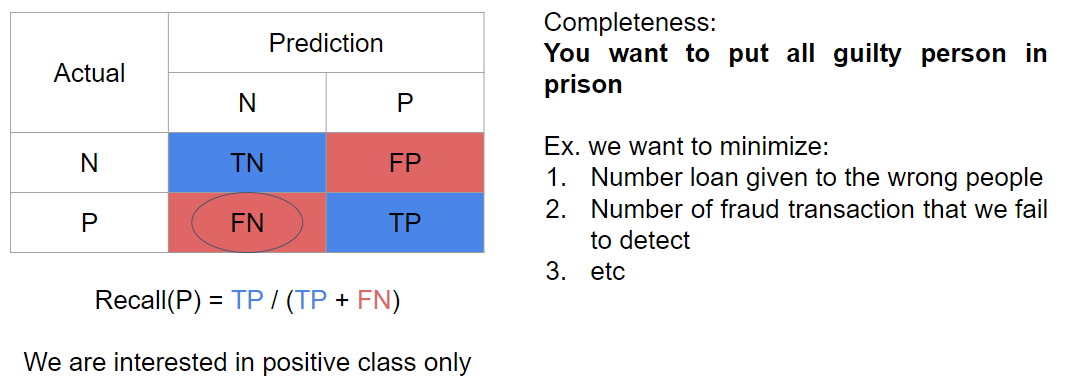

In [15]:
skfold = StratifiedKFold(n_splits = 5)

logreg_cv = cross_val_score(logreg, X_train_val, y_train_val, cv = skfold, scoring = 'recall')
knn_cv = cross_val_score(knn, X_train_val, y_train_val, cv = skfold, scoring = 'recall')
tree_cv = cross_val_score(tree, X_train_val, y_train_val, cv = skfold, scoring = 'recall')

In [16]:
print('CV logreg',logreg_cv)
print('CV knn',knn_cv)
print('CV tree',tree_cv)

CV logreg [0.5        0.31034483 0.5862069  0.44827586 0.48275862]
CV knn [0.4        0.31034483 0.37931034 0.24137931 0.27586207]
CV tree [0.63333333 0.37931034 0.51724138 0.24137931 0.51724138]


In [17]:
print('CV logreg',logreg_cv.std())
print('CV knn',knn_cv.std())
print('CV tree',tree_cv.std())

CV logreg 0.08992003317520893
CV knn 0.06021759987018779
CV tree 0.13481616986286768


In [18]:
print('CV logreg',logreg_cv.mean())
print('CV knn',knn_cv.mean())
print('CV tree',tree_cv.mean())

CV logreg 0.46551724137931033
CV knn 0.3213793103448276
CV tree 0.4577011494252874


FLEXIBLE METRICS

In [19]:
model = LogisticRegression(solver = 'liblinear', random_state = 2020)
metric = 'f1' # you can change with another metrics

def model_evaluation_cv(model, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(model, X_train_val, y_train_val, cv = skfold, scoring = metric)
  return model_cv

In [20]:
def print_result(model_cv):
  print('CV score',model_cv)
  print('CV score mean',model_cv.mean())
  print('CV score std',model_cv.std())

In [21]:
model_cv = model_evaluation_cv(model, 'f1')

In [22]:
print_result(model_cv)

CV score [0.56603774 0.43902439 0.65384615 0.53061224 0.52830189]
CV score mean 0.543564482325905
CV score std 0.06927688261828345


MODEL PERFORMACE IN TEST SET

In [23]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train_val,y_train_val)

LogisticRegression(solver='liblinear')

In [24]:
y_pred = logreg.predict(X_test)

In [25]:
print('recall', recall_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

recall 0.4864864864864865
precision 0.782608695652174
f1 0.6


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In [28]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

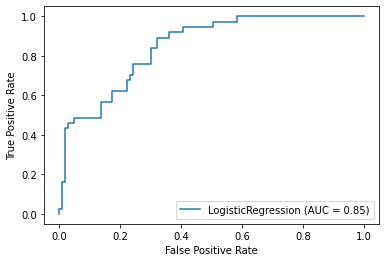

In [ ]:
plot_roc_curve(logreg, X_test, y_test)

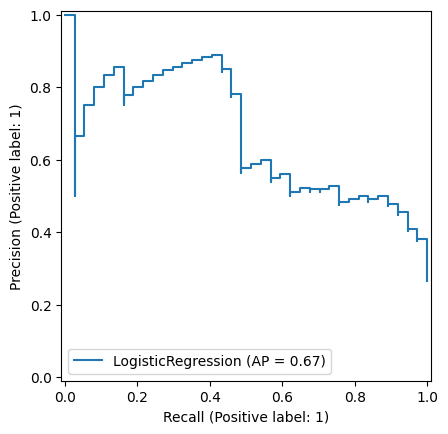

In [31]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(logreg, X_test, y_test)

> ## Simple Hyperprameter Tuning

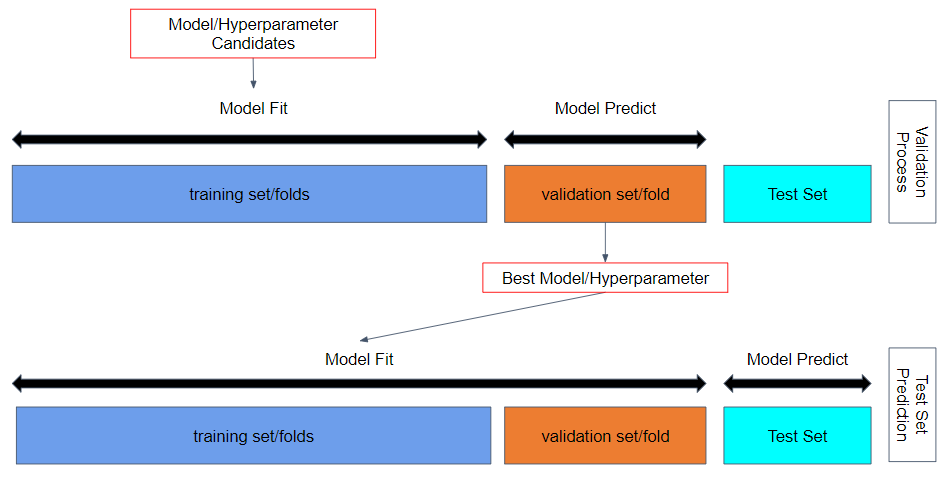

In [32]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

X_train 60 %
X_val 20 %
X_test 20 %

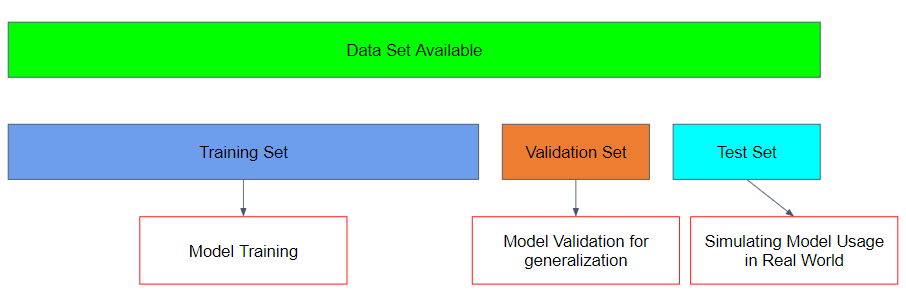

In [33]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    stratify = y_train_val,
    test_size = 0.25, # 25 % of train_val set equal to 20 % of all data set
    random_state = 2020)

In [34]:
hyperparam_c = [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001] # C = 1 is our benchmark
skfold = StratifiedKFold(n_splits = 5)

best_score = 0
cv_score_validation_fold = []

for i in hyperparam_c:
  logreg = LogisticRegression(C = i, solver = 'liblinear', random_state = 2020)
  cv_score = cross_val_score(logreg, X_train_val, y_train_val, cv = skfold, scoring = 'f1').mean()
  cv_score_validation_fold.append(cv_score)

  if cv_score > best_score:
    best_score = cv_score
    best_paramas = {'C':i}

In [35]:
print('best score',best_score)
print('best params',best_paramas)

best score 0.5563225088777649
best params {'C': 0.05}


In [36]:
hyperparam_c = [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]

training_score = []
testing_score = []

for i in hyperparam_c:
  logreg = LogisticRegression(C = i, solver = 'liblinear', random_state = 2020)
  logreg.fit(X_train,y_train)

  y_predict_train = logreg.predict(X_train)
  training_score.append(f1_score(y_train,y_predict_train))

  y_predict_val = logreg.predict(X_val)
  testing_score.append(f1_score(y_val,y_predict_val))

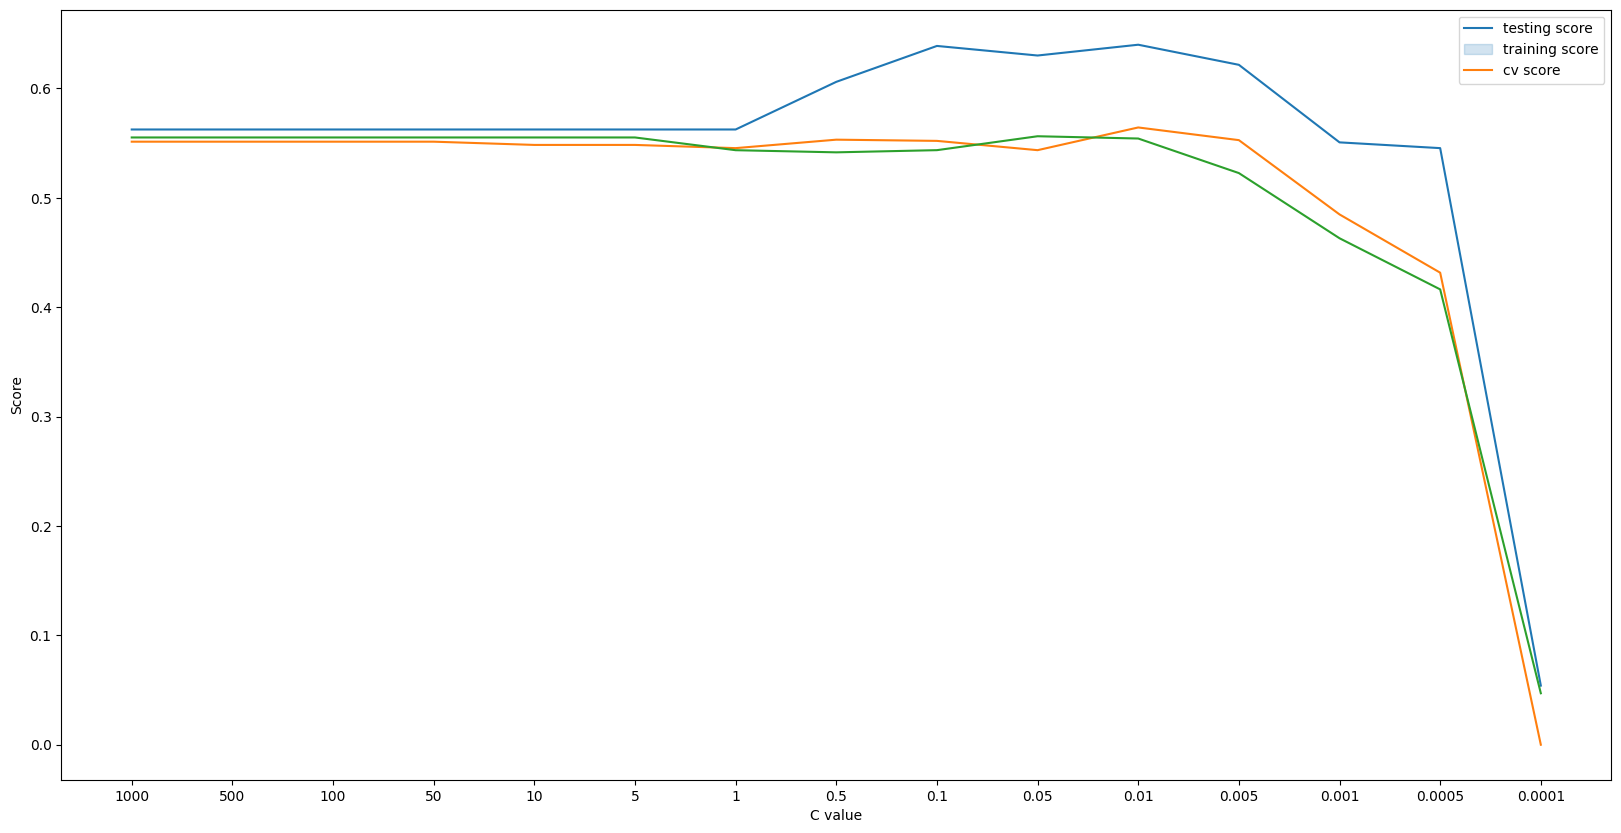

In [38]:
length = range(len(hyperparam_c))

plt.figure(figsize=(20,10))

sns.lineplot(x=length, y=testing_score)
sns.lineplot(x=length, y=training_score)
sns.lineplot(x=length, y=cv_score_validation_fold)

plt.legend(['testing score', 'training score', 'cv score'])
plt.xticks(length, hyperparam_c)
plt.xlabel("C value")
plt.ylabel("Score")
plt.show()


> ## Final Result Comparison : Simple Hyperparameter Tuning

FINAL MODEL PERFORMANCE BEFORE

In [39]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train_val,y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



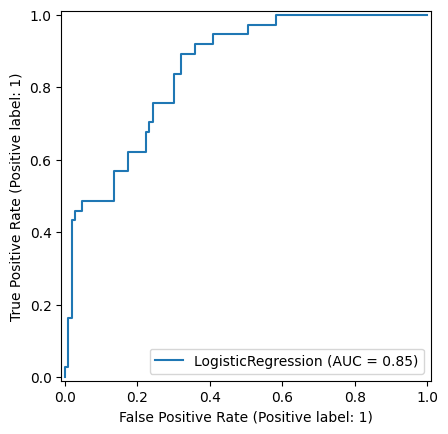

In [41]:
RocCurveDisplay.from_estimator(logreg, X_test, y_test)

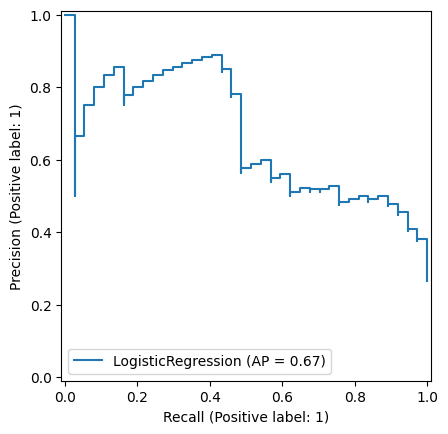

In [43]:
PrecisionRecallDisplay.from_estimator(logreg, X_test, y_test)

FINAL MODEL PERFORMACE AFTER

In [44]:
logreg = LogisticRegression(solver = 'liblinear', C = 0.05)
logreg.fit(X_train_val,y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       103
           1       0.68      0.51      0.58        37

    accuracy                           0.81       140
   macro avg       0.76      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140



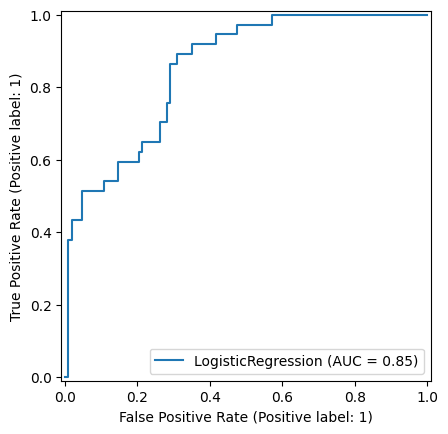

In [46]:
RocCurveDisplay.from_estimator(logreg, X_test, y_test)

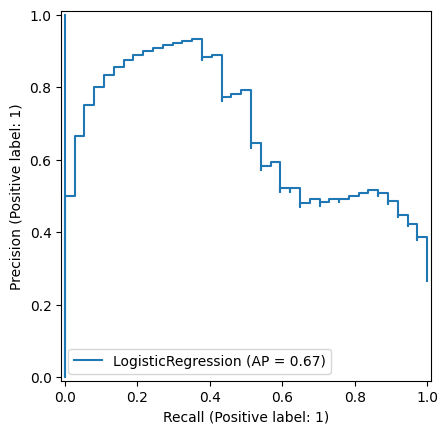

In [48]:
PrecisionRecallDisplay.from_estimator(logreg, X_test, y_test)

In term of f1 score, your model performance decrease after hyperparameter tuning. This can be happen because :
1. the improvement in the cross validation score is insignificant
1. your choice of hyperparameter resulted in overfitting/unstable model

Solution :
1. changes the model
1. more feature engineering
1. add another hyperprameter, (we are gonna try this)

> ## Hyperparameter Tuning Grid Search

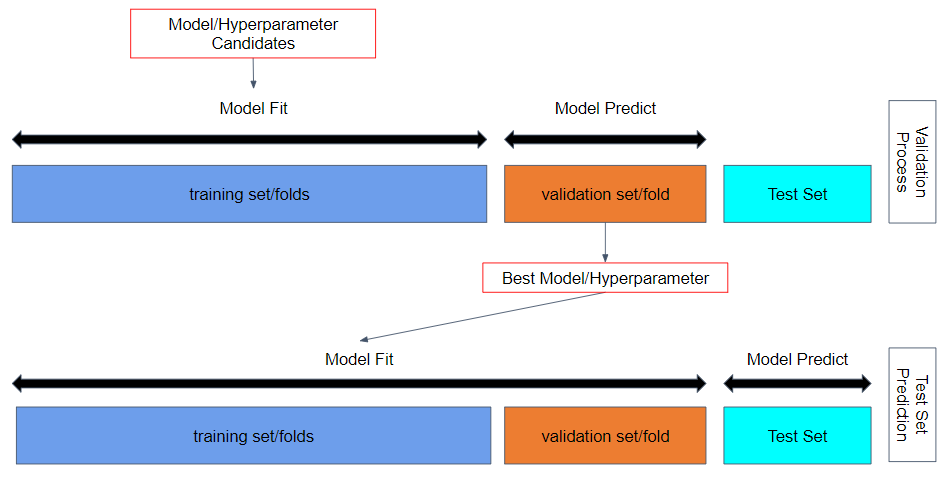

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
hyperparam_space = {
    'C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], # benck mark 1 C = 1 bench mark 2 C = 0.05
    'max_iter':[100, 200, 300, 400, 500, 1000] # bench mark max_iter = 100
}

1. C  15 hyperparameters
1. max_iter 6 15 hyperparameters
1. CV 5 fold
<br>
so, this step will train model 15*6*5 = 450 times

In [51]:
skfold = StratifiedKFold(n_splits = 5)

logreg = LogisticRegression(solver = 'liblinear', random_state = 2020)

grid_search = GridSearchCV(
    logreg, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 # use all cores
)

In [52]:
grid_search.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=2020,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05,
                               0.01, 0.005, 0.001, 0.0005, 0.0001],
                         'max_iter': [100, 200, 300, 400, 500, 1000]},
             scoring='f1')

In [53]:
print('best score',grid_search.best_score_)
print('best param',grid_search.best_params_)

best score 0.5563225088777649
best param {'C': 0.05, 'max_iter': 100}


In [54]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008501,0.001827,0.011252,0.001306,1000.0000,100,"{'C': 1000, 'max_iter': 100}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
1,0.007474,0.002089,0.011805,0.001848,1000.0000,200,"{'C': 1000, 'max_iter': 200}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
2,0.007460,0.001719,0.011062,0.001027,1000.0000,300,"{'C': 1000, 'max_iter': 300}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
3,0.007993,0.001385,0.011148,0.000814,1000.0000,400,"{'C': 1000, 'max_iter': 400}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
4,0.006607,0.000450,0.011524,0.001313,1000.0000,500,"{'C': 1000, 'max_iter': 500}",0.576923,0.476190,0.653846,0.530612,0.538462,0.555207,0.058873,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.011178,0.003508,0.016172,0.005855,0.0001,200,"{'C': 0.0001, 'max_iter': 200}",0.000000,0.235294,0.000000,0.000000,0.000000,0.047059,0.094118,85
86,0.007414,0.002184,0.014068,0.004909,0.0001,300,"{'C': 0.0001, 'max_iter': 300}",0.000000,0.235294,0.000000,0.000000,0.000000,0.047059,0.094118,85
87,0.009125,0.001861,0.019168,0.003986,0.0001,400,"{'C': 0.0001, 'max_iter': 400}",0.000000,0.235294,0.000000,0.000000,0.000000,0.047059,0.094118,85
88,0.009136,0.003131,0.015979,0.007368,0.0001,500,"{'C': 0.0001, 'max_iter': 500}",0.000000,0.235294,0.000000,0.000000,0.000000,0.047059,0.094118,85


This method still resulted in C = 0.05 max_iter = 100 which is basically the same. so no effect in adding max_iter. you can use another method or more FE.

> ## Final Result Comparison : Hyperparameter Tuning Grid Search

FINAL MODEL PERFORMANCE BEFORE

In [55]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train_val,y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



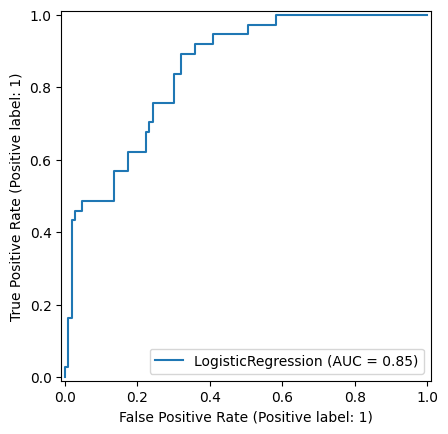

In [57]:
RocCurveDisplay.from_estimator(logreg, X_test, y_test)

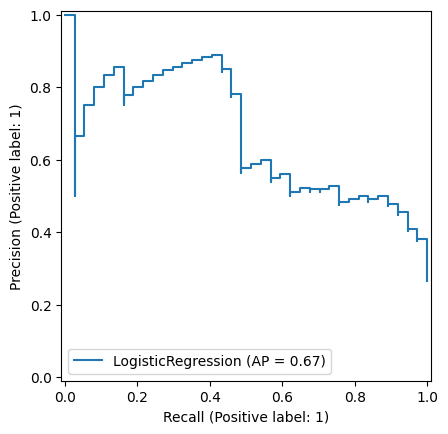

In [59]:
PrecisionRecallDisplay.from_estimator(logreg, X_test, y_test)

FINAL MODEL PERFORMACE AFTER

In [60]:
logreg = grid_search.best_estimator_
logreg.fit(X_train_val,y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       103
           1       0.68      0.51      0.58        37

    accuracy                           0.81       140
   macro avg       0.76      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140



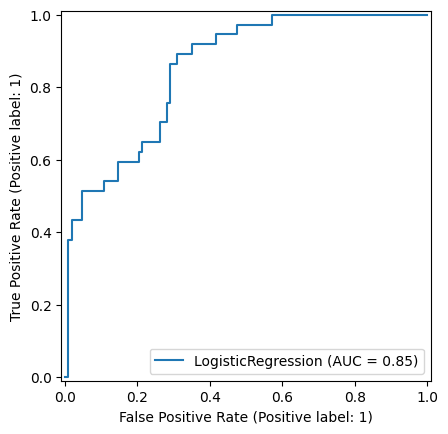

In [62]:
RocCurveDisplay.from_estimator(logreg, X_test, y_test)

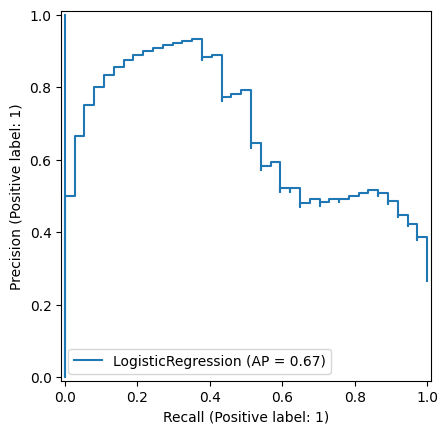

In [63]:
PrecisionRecallDisplay.from_estimator(logreg, X_test, y_test)

In term of f1 score, your model performance decrease after hyperparameter tuning. This can be happen because :
1. the improvement in the cross validation score is insignificant
1. your choice of hyperparameter resulted in overfitting/unstable model

Solution :
1. changes the model
1. more feature engineering
1. add another hyperprameter, (we aleready try this, either try again or try 1 or 2)

# Information Leakage

In [82]:
import numpy as np
import pandas as pd

In [83]:
rnd = np.random.RandomState(seed = 2020)
X = rnd.normal(size = (100, 10000))
y = rnd.normal(size = (100, ))

Data generated with condition that there is no relationship between X and y

> ## Information Leakage

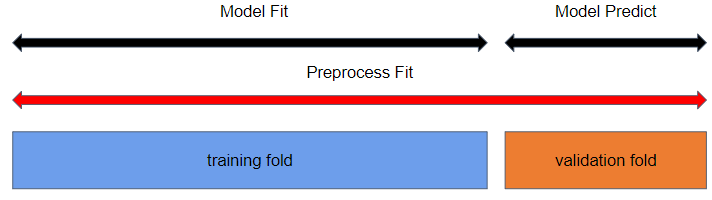

In [84]:
from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)
X_selected = select.transform(X)
X_selected.shape

(100, 500)

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [86]:
cross_val_score(Ridge(), X_selected, y, cv = 5)

array([0.92165345, 0.89445668, 0.92827414, 0.93088559, 0.91044624])

This result indicating a very good model while data generated entirely random. weird isn't it ?

> ## No Information Leakage

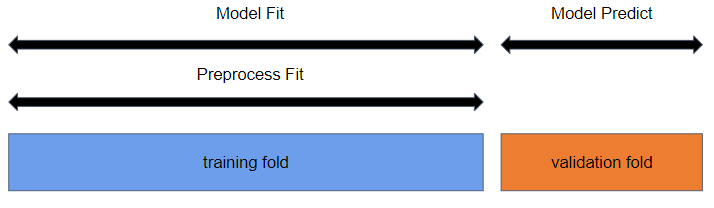

In [87]:
from sklearn.pipeline import Pipeline

In [88]:
select = SelectPercentile(score_func=f_regression, percentile=5)

pipe = Pipeline([
                 ("select", select),
                 ("ridge", Ridge())
])

In [89]:
cross_val_score(pipe, X, y, cv = 5)

array([-0.0330359 , -0.07840338, -0.06731106, -0.04544685, -0.07314928])

this is what the result should be the R-square is vary small or even negative. Information leakege show that the model can have overly optimistic result to validation folds.

# Algorithm Chains : adult dataset

> ## Data

In [90]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 4.2 MB/s eta 0:00:00


In [91]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, recall_score, precision_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline

In [93]:
df_adult = pd.read_csv('adult.csv')

In [94]:
df_adult.replace('?',np.nan,inplace = True)

In [95]:
df_adult.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


> ## Preprocessing

In [96]:
binary_encoder_pipeline = Pipeline([
                                    ('imputer',SimpleImputer(strategy = 'constant',fill_value = 'NC')),
                                    ('binary encoder',ce.BinaryEncoder())
])

transformer = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),['relationship','race','sex']),
                                 ('binary encoder',binary_encoder_pipeline,['workclass','marital.status','occupation','native.country'])
                                ], remainder = 'passthrough')

> ## Data Splitting

In [97]:
X = df_adult.drop(columns = ['fnlwgt','income','education'])
y = np.where(df_adult['income']=='>50K',1,0)

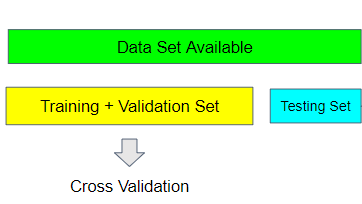

In [98]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify = y,
    random_state = 2020)

> ## Model Evaluation : Benchmark  

In [100]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)
tree = DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth = 5,
    random_state = 2020)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',tree)
])

In [101]:
model_cv = cross_val_score(estimator, X_train_val, y_train_val, scoring = 'f1')

In [102]:
print('CV score',model_cv)
print('CV score mean',model_cv.mean())
print('CV score std',model_cv.std())

CV score [0.59255482 0.60502513 0.59898477 0.62110553 0.6221336 ]
CV score mean 0.6079607686024484
CV score std 0.011833711368265562


FLEXIBLE METRICS

In [103]:
def model_evaluation_cv(model, metric):
  skfold = StratifiedKFold(n_splits = 5)
  estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)])
  model_cv = cross_val_score(estimator, X_train_val, y_train_val, cv = skfold, scoring = metric)
  return model_cv

In [104]:
def print_result(model_cv):
  print('CV score',model_cv)
  print('CV score mean',model_cv.mean())
  print('CV score std',model_cv.std())

In [105]:
model = LogisticRegression(solver = 'liblinear', random_state = 2020)
metric = 'f1'

model_cv = model_evaluation_cv(model, 'f1')
print_result(model_cv)

CV score [0.60656541 0.66008463 0.62760291 0.64336325 0.66698024]
CV score mean 0.6409192870778018
CV score std 0.021954369193189053


In [106]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 2020)
metric = 'f1'

model_cv = model_evaluation_cv(model, 'f1')
print_result(model_cv)

CV score [0.59255482 0.60502513 0.59898477 0.62110553 0.6221336 ]
CV score mean 0.6079607686024484
CV score std 0.011833711368265562


MODEL PERFORMANCE

In [107]:
model = LogisticRegression(solver = 'liblinear', random_state = 2020)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])
estimator.fit(X_train_val,y_train_val)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['relationship', 'race',
                                                   'sex']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NC',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                                                  ['workclass',
                                                   'marital.status',
                                                   'occupation',
                                                   'native.country'])])),
                ('clf',
                 LogisticRegression(random_state=2020, solver='liblinear'))])

In [108]:
y_pred = estimator.predict(X_test)

In [109]:
print('recall', recall_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

recall 0.588265306122449
precision 0.7334605597964376
f1 0.6528878822197055


In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6181
           1       0.73      0.59      0.65      1960

    accuracy                           0.85      8141
   macro avg       0.81      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



In [112]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

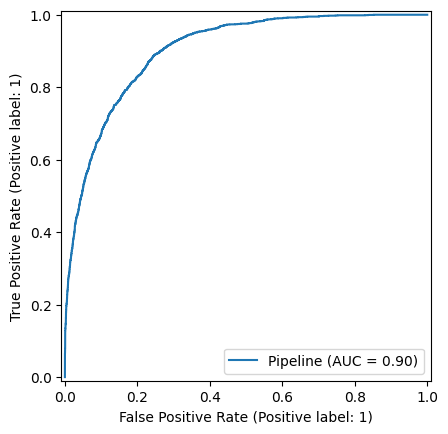

In [113]:
RocCurveDisplay.from_estimator(estimator, X_test, y_test)

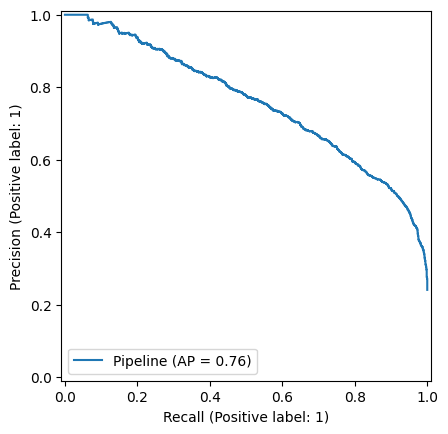

In [114]:
PrecisionRecallDisplay.from_estimator(estimator, X_test, y_test)

> ## Hyperparameter Tuning

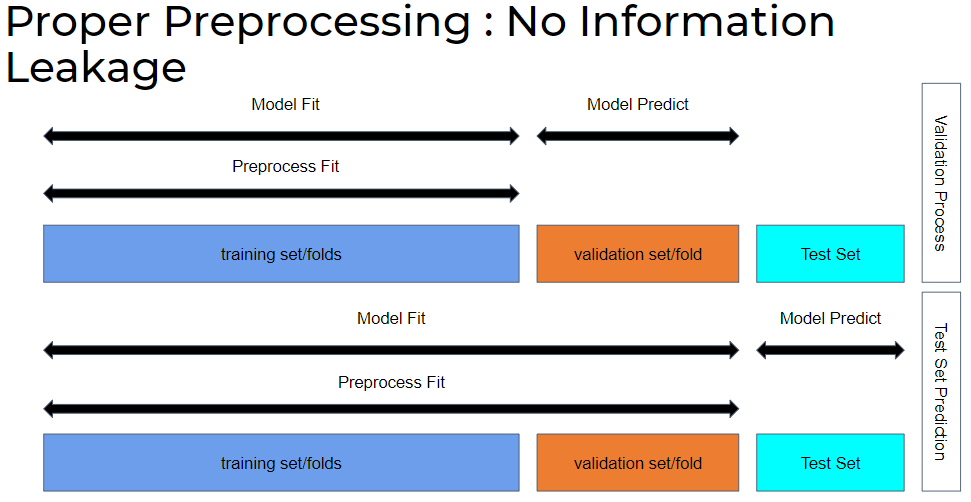

In [115]:
model = LogisticRegression(solver = 'liblinear', random_state = 2020)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])

hyperparam_space = {
    'clf__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'clf__solver':['liblinear','newton-cg']
}

skfold = StratifiedKFold(n_splits = 5)

grid_search = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 # use all cores
)

In [116]:
grid_search.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['relationship',
                                                                          'race',
                                                                          'sex']),
                                                                        ('binary '
                                                                         'encoder',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='NC',
                                                                                                        strategy='constant')),
                                                                                         ('binary '
                                                                                          'encoder',
                                                                                          BinaryEncoder())]),
                                                                         ['workclass',
                                                                          'marital.status',
                                                                          'occupation',
                                                                          'native.country'])])),
                                       ('clf',
                                        LogisticRegression(random_state=2020,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'clf__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'clf__solver': ['liblinear', 'newton-cg']},
             scoring='f1')

In [117]:
print('best score',grid_search.best_score_)
print('best param',grid_search.best_params_)

best score 0.6458918589143607
best param {'clf__C': 100, 'clf__solver': 'newton-cg'}


In [118]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.537304,0.095309,0.041219,0.001565,100.000,liblinear,"{'clf__C': 100, 'clf__solver': 'liblinear'}",0.606654,0.660085,0.632089,0.647502,0.661017,0.641469,0.020323,6
1,1.969299,0.526945,0.055266,0.016044,100.000,newton-cg,"{'clf__C': 100, 'clf__solver': 'newton-cg'}",0.625773,0.665730,0.628187,0.642790,0.666980,0.645892,0.017698,1
2,0.548683,0.038889,0.047309,0.007233,10.000,liblinear,"{'clf__C': 10, 'clf__solver': 'liblinear'}",0.606654,0.661025,0.631120,0.646893,0.665728,0.642284,0.021523,5
3,1.571479,0.483405,0.043604,0.003410,10.000,newton-cg,"{'clf__C': 10, 'clf__solver': 'newton-cg'}",0.624465,0.663543,0.628846,0.643732,0.668542,0.645826,0.017770,2
4,0.502167,0.041653,0.047893,0.008620,1.000,liblinear,"{'clf__C': 1, 'clf__solver': 'liblinear'}",0.606565,0.660085,0.627603,0.643363,0.666980,0.640919,0.021954,7
5,1.843447,0.465892,0.060909,0.020703,1.000,newton-cg,"{'clf__C': 1, 'clf__solver': 'newton-cg'}",0.624762,0.664477,0.627526,0.642756,0.666353,0.645175,0.017636,3
6,0.564914,0.110327,0.049035,0.010824,0.100,liblinear,"{'clf__C': 0.1, 'clf__solver': 'liblinear'}",0.601779,0.647255,0.621100,0.637363,0.656085,0.632716,0.019345,8
7,1.236596,0.116154,0.045000,0.003781,0.100,newton-cg,"{'clf__C': 0.1, 'clf__solver': 'newton-cg'}",0.622778,0.660368,0.623188,0.644550,0.664775,0.643132,0.017774,4
8,0.464802,0.020217,0.041310,0.002544,0.010,liblinear,"{'clf__C': 0.01, 'clf__solver': 'liblinear'}",0.578785,0.587368,0.562803,0.584503,0.596013,0.581894,0.011048,10
9,1.069382,0.027708,0.043617,0.002026,0.010,newton-cg,"{'clf__C': 0.01, 'clf__solver': 'newton-cg'}",0.615007,0.636719,0.605144,0.625490,0.652724,0.627017,0.016613,9


> ## Final Result Comparison

MODEL PERFORMANCE BEFORE

In [119]:
model = LogisticRegression(solver = 'liblinear', random_state = 2020)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])

estimator.fit(X_train_val,y_train_val)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['relationship', 'race',
                                                   'sex']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NC',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                                                  ['workclass',
                                                   'marital.status',
                                                   'occupation',
                                                   'native.country'])])),
                ('clf',
                 LogisticRegression(random_state=2020, solver='liblinear'))])

In [120]:
y_pred = estimator.predict(X_test)

In [121]:
print('recall', recall_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

recall 0.588265306122449
precision 0.7334605597964376
f1 0.6528878822197055


In [122]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6181
           1       0.73      0.59      0.65      1960

    accuracy                           0.85      8141
   macro avg       0.81      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



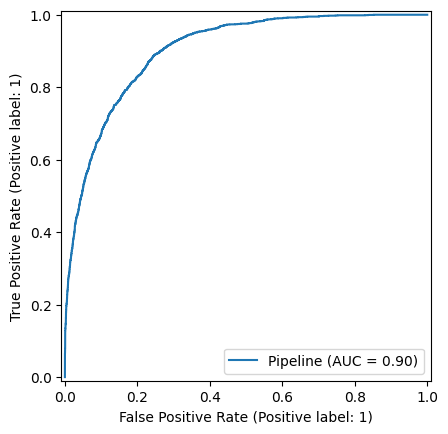

In [124]:
RocCurveDisplay.from_estimator(estimator, X_test, y_test)

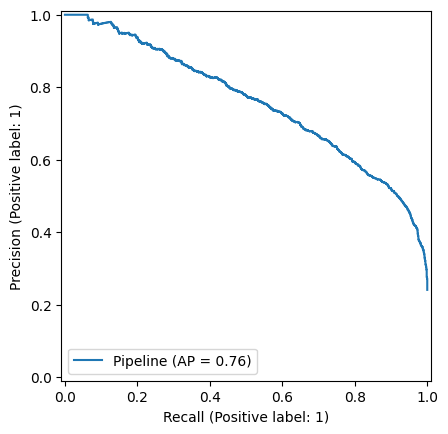

In [125]:
PrecisionRecallDisplay.from_estimator(estimator, X_test, y_test)

MODEL PERFORMANCE AFTER

In [126]:
grid_search.best_estimator_.fit(X_train_val,y_train_val)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['relationship', 'race',
                                                   'sex']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NC',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                                                  ['workclass',
                                                   'marital.status',
                                                   'occupation',
                                                   'native.country'])])),
                ('clf',
                 LogisticRegression(C=100, random_state=2020,
                                    solver='newton-cg'))])

In [127]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [128]:
print('recall', recall_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

recall 0.5984693877551021
precision 0.7276674937965261
f1 0.6567749160134378


In [129]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6181
           1       0.73      0.60      0.66      1960

    accuracy                           0.85      8141
   macro avg       0.80      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



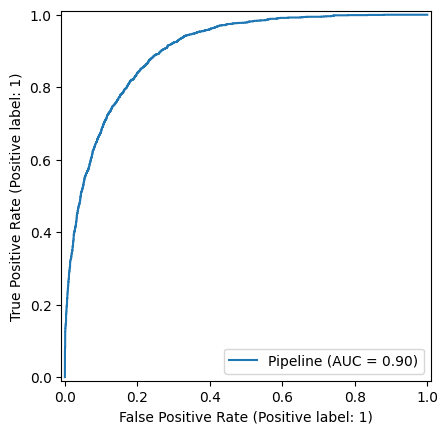

In [131]:
RocCurveDisplay.from_estimator(grid_search.best_estimator_, X_test, y_test)

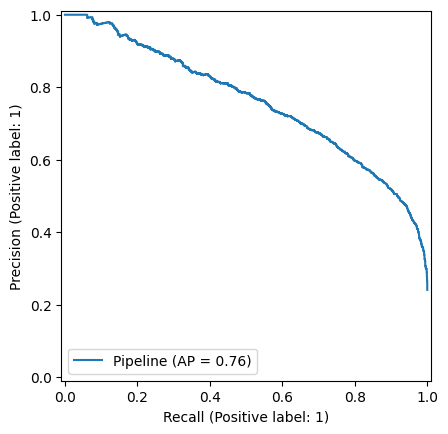

In [132]:
PrecisionRecallDisplay.from_estimator(grid_search.best_estimator_, X_test, y_test)

f1 score slightly increase from 0.6527 to 0.6567